<a href="https://colab.research.google.com/github/Ing-JorgeLuisPinto/IA_2025/blob/main/arbol_de_desicion_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

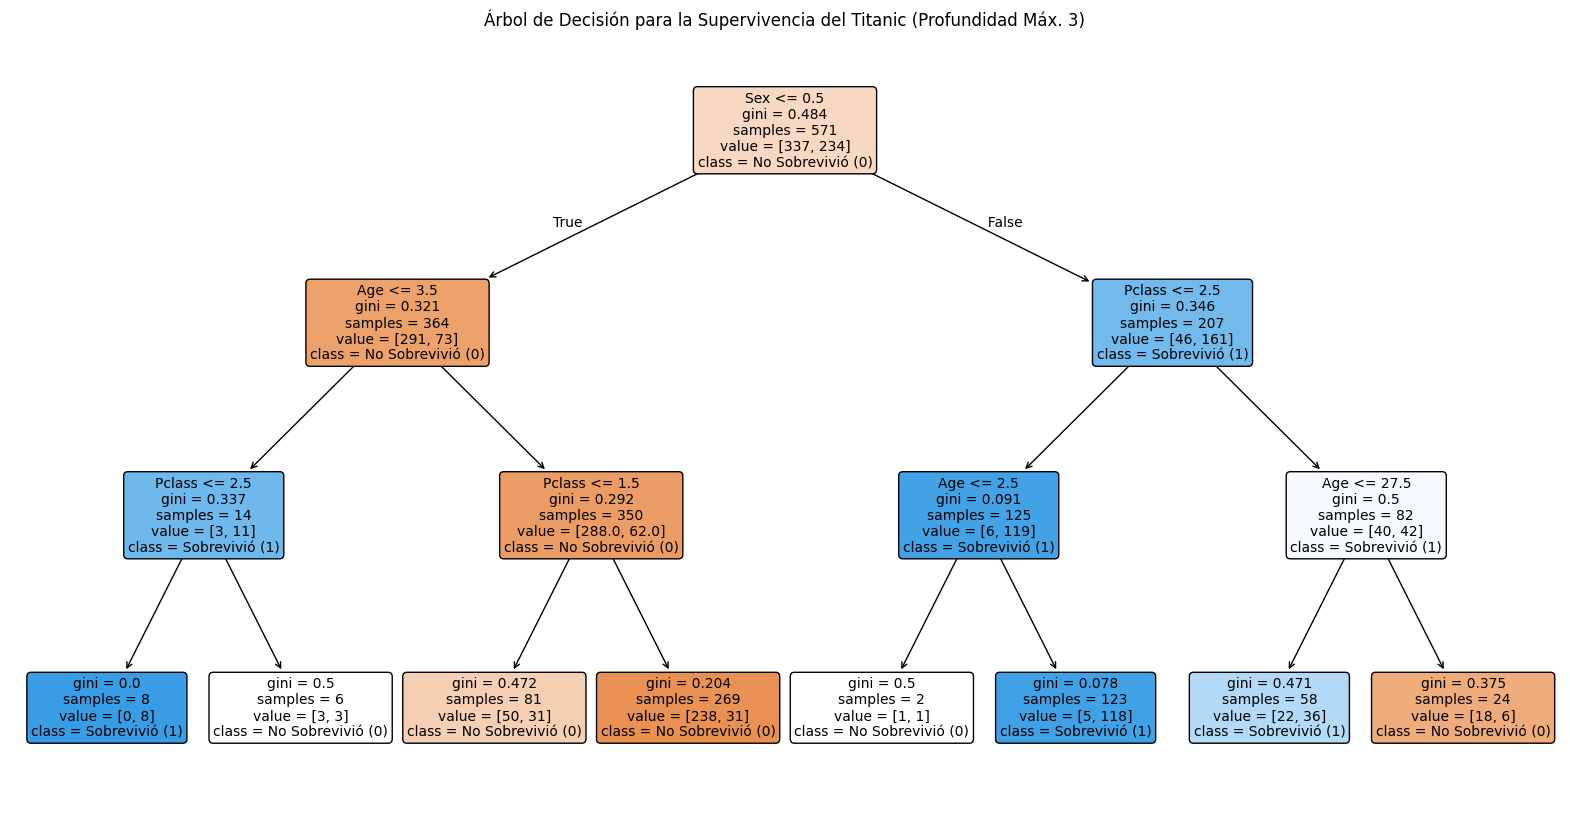

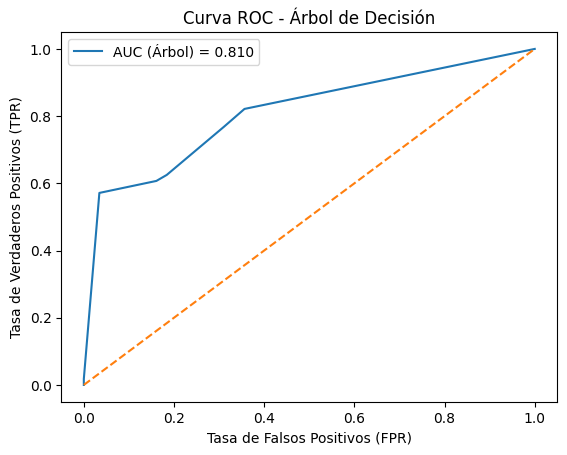


El valor AUC para el Árbol de Decisión es: 0.810


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importamos el Árbol de Decisión
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. PREPROCESAMIENTO DE DATOS ---
df = pd.read_csv("/content/titanic-train.csv")

# Seleccionar solo las columnas usadas en tu código
df = df[["Survived", "Pclass", "Sex", "Age"]]

# Convertir la columna 'Sex' a valores numéricos (0=hombre, 1=mujer)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Eliminar filas con valores faltantes (NaN) en las columnas seleccionadas
df = df.dropna()

# Definir variables predictoras (X) y la variable objetivo (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. CREACIÓN Y ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN ---
# Se inicializa el modelo de Árbol de Decisión
# max_depth=3 limita la profundidad para una visualización clara
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# --- 3. VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN ---
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True, # Rellena los nodos con color según la clase
    rounded=True, # Bordes redondeados
    feature_names=X.columns.tolist(), # Nombres de las variables
    class_names=['No Sobrevivió (0)', 'Sobrevivió (1)'], # Nombres de las clases
    fontsize=10
)
plt.title("Árbol de Decisión para la Supervivencia del Titanic (Profundidad Máx. 3)")
plt.show() # Muestra la imagen del árbol

# --- 4. EVALUACIÓN (CURVA ROC Y AUC) ---
# Calcular probabilidades de supervivencia en el conjunto de prueba
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calcular los valores para la curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Mostrar la curva ROC del Árbol de Decisión
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"AUC (Árbol) = {auc_dt:.3f}")
plt.plot([0, 1], [0, 1], "--") # Línea de referencia aleatoria
plt.title("Curva ROC - Árbol de Decisión")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()

print(f"\nEl valor AUC para el Árbol de Decisión es: {auc_dt:.3f}")

In [ ]:
0.0 empezamos
0.2 Por cada 100 personas que realmente no sobrevivieron, el modelo se equivocó al decir que 20 de ellas sí lo hicieron.  0-6 De todas las personas que realmente sí sobrevivieron, el modelo acertó a identificar al 60%.
los q no murieron y la maquina dijo q no murieron y los que si murieron y la maquina dijo q no

#Resumen: Factores Clave de Supervivencia del Titanic
El análisis de los datos del Titanic mediante modelos predictivos (Regresión Logística y Árbol de Decisión) revela que, de las características evaluadas (Sex, Pclass, Age), el factor más crucial para predecir la supervivencia es el Sexo.

- Sex (Sexo)Positivo Alto ($\approx +2.5$)Factor más crucial. Ser mujer aumenta drásticamente la probabilidad de supervivencia.
- Pclass (Clase)Negativo Alto ($\approx -1.0$)Segundo factor más importante. Las clases inferiores (mayor número) disminuyen significativamente la probabilidad de supervivencia.
- Age (Edad)Negativo Bajo ($\approx -0.04$)Factor menos influyente. Aumentar la edad reduce ligeramente la probabilidad de sobrevivir.
### Conclusión: El Sexo es el factor dominante, seguido por la Clase de Pasajero.

# 2 Evaluación del Modelo (Curva ROC y AUC)
La Curva ROC y su Área Bajo la Curva (AUC) miden el rendimiento del modelo en la clasificación:
- AUC: Con un valor de $\approx 0.84$, el modelo muestra una buena capacidad de discriminación (84% de probabilidad de clasificar correctamente un par de sobreviviente/no sobreviviente al azar).
-Falsos Positivos (FPR): Representan la Tasa de Falsos Positivos. Esto ocurre cuando el modelo predice incorrectamente que alguien sobrevivió (Predicción Positiva), cuando en realidad no lo hizo. El objetivo es mantener esta tasa lo más baja posible.
-Verdaderos Positivos (TPR): Representan la Tasa de Verdaderos Positivos (Sensibilidad). Es la proporción de sobrevivientes que el modelo identificó correctamente. El objetivo es maximizar esta tasa.


--- Importancia de las Características (Árbol de Decisión) ---
  Característica  Importancia (Gini)
1            Sex            0.425339
2            Age            0.404402
0         Pclass            0.170258


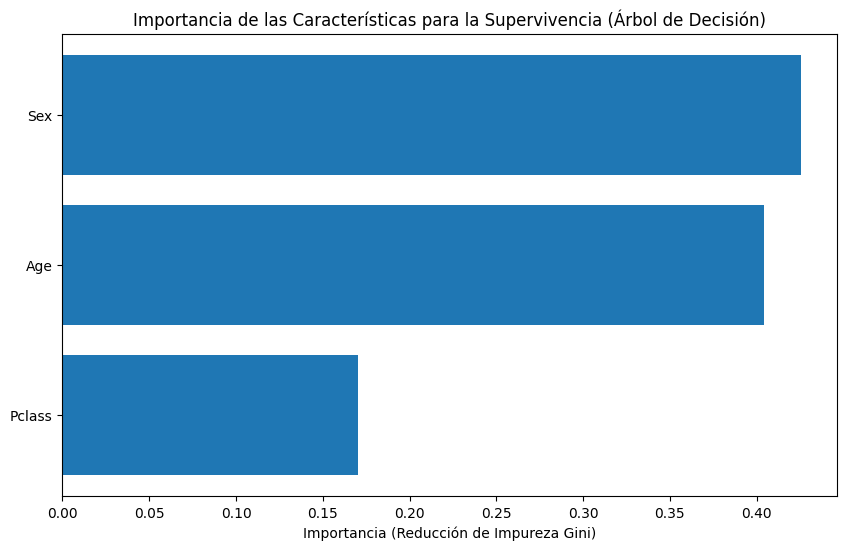

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS (REUSANDO EL CÓDIGO ANTERIOR) ---
df = pd.read_csv("titanic-train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN ---
# Se utiliza el modelo sin limitar la profundidad para evaluar la importancia real
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- 3. EXTRACCIÓN Y VISUALIZACIÓN DE LA IMPORTANCIA ---
# Extraer la importancia de las características del modelo
importances = dt_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para un análisis claro
feature_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia (Gini)': importances
})

# Ordenar por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importancia (Gini)', ascending=False)

print("--- Importancia de las Características (Árbol de Decisión) ---")
print(feature_importance_df)

# Visualización Gráfica
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia (Gini)'])
plt.xlabel("Importancia (Reducción de Impureza Gini)")
plt.title("Importancia de las Características para la Supervivencia (Árbol de Decisión)")
plt.gca().invert_yaxis()
plt.show()

In [3]:
# --- 1. PREPARACIÓN DE DATOS (REUSANDO EL CÓDIGO ANTERIOR) ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar y preprocesar
df = pd.read_csv("titanic-train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --- 2. EXTRACCIÓN Y VISUALIZACIÓN DE COEFICIENTES ---
# Crear un DataFrame para mostrar los coeficientes
coefficients = pd.DataFrame(
    {'Feature': X.columns, 'Coefficient': model.coef_[0]}
)

# Calcular el valor absoluto para ordenar por magnitud de importancia
coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])

# Ordenar por el peso (magnitud)
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print("--- Coeficientes del Modelo de Regresión Logística ---")
print(coefficients)

--- Coeficientes del Modelo de Regresión Logística ---
  Feature  Coefficient  Absolute Coefficient
1     Sex     2.532197              2.532197
0  Pclass    -1.248735              1.248735
2     Age    -0.042532              0.042532
